# Radio Approximations
Objective: Create a script that plots the full Planck curve against the Rayleigh-Jeans approximation for a typical astrophysical source (e.g., the CMB at 2.7K and a gas cloud at 100K) to see exactly where and why the approximation works in the radio band.

In [1]:
# 0. Import Libraries

import numpy as np
import matplotlib.pyplot as plt

# Constants (in SI Units)
h = 6.626e-34  # Planck constant (J s)
k = 1.381e-23  # Boltzmann constant (J/K)
c = 3.0e8      # Speed of light (m/s)

def planck_law(nu, T):
    """Calculates Spectral Radiance B_nu using full Planck Law."""
    term1 = (2*h*nu**3) / c**2
    term2 = 1 / (np.exp((h*nu)/(k*T))-1)
    return term1 * term2

def rayleigh_jeans(nu, T):
    """Calculates Spectral Radiance B_nu using Rayleigh-Jeans approximation."""
    return (2 * nu**2 * k * T) / c**2

In [3]:
# 2. Setting up the parameters

# Frequency range: 10 MHz to 100 THz (covering Radio to Far-IR)
# Using logspace because the range is huge
frequencies = np.logspace(7, 14, 500)

# Temperature of cold interstellar Cloud
T_cloud = 50.0 #Kelvin

# Calculate Intensity
B_planck = planck_law(frequencies, T_cloud)
B_rj = rayleigh_jeans(frequencies, T_cloud)

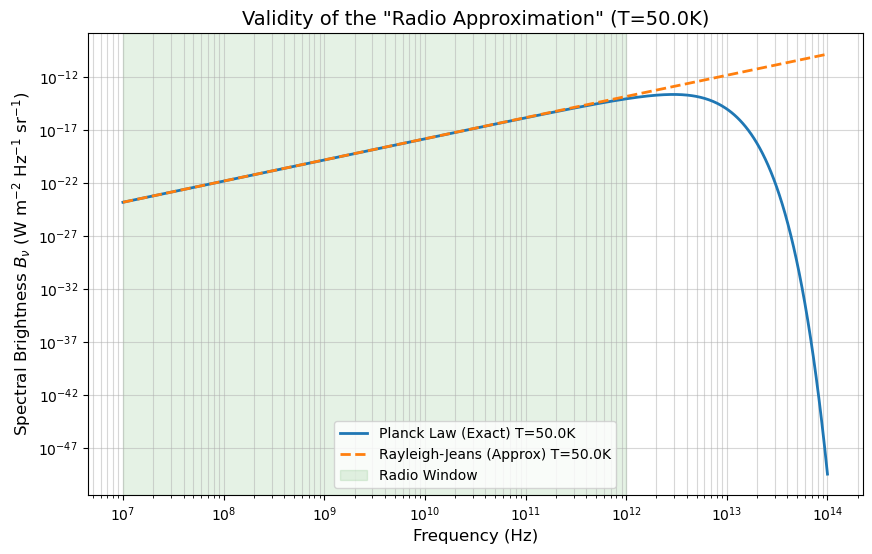

In [4]:
# 3. Visualizations

plt.figure(figsize=(10, 6))

# Plot both laws
plt.plot(frequencies, B_planck, label=f'Planck Law (Exact) T={T_cloud}K', linewidth=2)
plt.plot(frequencies, B_rj, '--', label=f'Rayleigh-Jeans (Approx) T={T_cloud}K', linewidth=2)

# Highlight the "Radio Window" (approx 10 MHz to 1 THz)
plt.axvspan(1e7, 1e12, color='green', alpha=0.1, label='Radio Window')

# Formatting for log-log scale (standard in astronomy)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Frequency (Hz)', fontsize=12)
plt.ylabel('Spectral Brightness $B_\\nu$ (W m$^{-2}$ Hz$^{-1}$ sr$^{-1}$)', fontsize=12)
plt.title(f'Validity of the "Radio Approximation" (T={T_cloud}K)', fontsize=14)
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.5)

plt.show()